In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [2]:
sns.set_style('whitegrid')

In [3]:
df = pd.read_csv('iphone_purchase_records.csv')

In [4]:
df.head()

,Gender,Age,Salary,Purchase Iphone
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Gender           400 non-null    object
 1   Age              400 non-null    int64 
 2   Salary           400 non-null    int64 
 3   Purchase Iphone  400 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 12.6+ KB


In [6]:
df.describe()

,Age,Salary,Purchase Iphone
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


In [7]:
df_gender = pd.get_dummies(df['Gender'])

In [8]:
df_gender

,Female,Male
0,0,1
1,0,1
2,1,0
3,1,0
4,0,1
...,...,...
395,1,0
396,0,1
397,1,0
398,0,1


In [9]:
df_new = pd.concat([df,df_gender],axis=1)

In [10]:
df_new.head()

,Gender,Age,Salary,Purchase Iphone,Female,Male
0,Male,19,19000,0,0,1
1,Male,35,20000,0,0,1
2,Female,26,43000,0,1,0
3,Female,27,57000,0,1,0
4,Male,19,76000,0,0,1


In [11]:
df_new.drop(['Gender','Female'],axis=1,inplace=True)

In [12]:
df_new

,Age,Salary,Purchase Iphone,Male
0,19,19000,0,1
1,35,20000,0,1
2,26,43000,0,0
3,27,57000,0,0
4,19,76000,0,1
...,...,...,...,...
395,46,41000,1,0
396,51,23000,1,1
397,50,20000,1,0
398,36,33000,0,1


In [17]:
correlation = df_new.corr()

<AxesSubplot:>

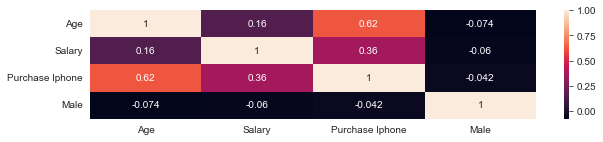

In [19]:
plt.figure(figsize=(10,2))

sns.heatmap(data=correlation,annot=True)

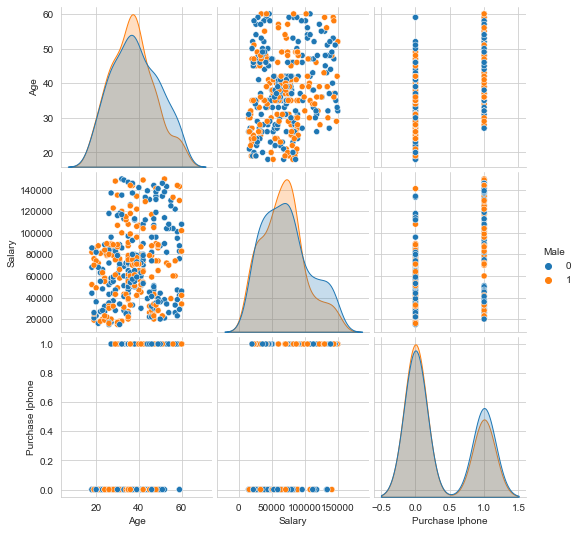

In [20]:
sns.pairplot(data=df_new,hue='Male',kind='scatter')

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
train_test_split


<function sklearn.model_selection._split.train_test_split(*arrays, test_size=None, train_size=None, random_state=None, shuffle=True, stratify=None)>

In [38]:
X = df_new.drop('Purchase Iphone',axis=1)
y = df_new['Purchase Iphone']


X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.3, random_state=101)

In [39]:
X.shape

(400, 3)

In [40]:
y.shape

(400,)

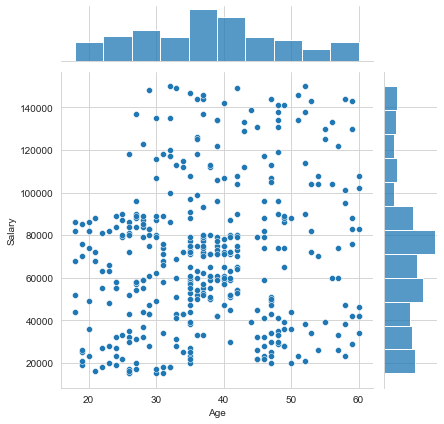

In [41]:
sns.jointplot(x='Age',y='Salary',data=df_new,kind='scatter')

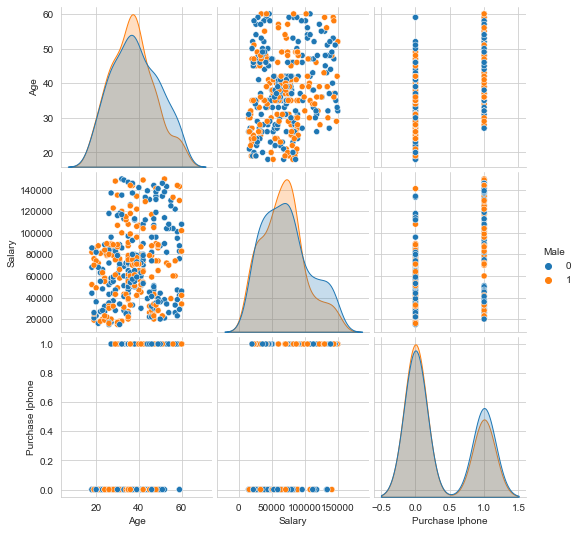

In [42]:
sns.pairplot(data=df_new,kind='scatter',hue='Male')

In [43]:
from sklearn.linear_model import LogisticRegression

In [44]:
model = LogisticRegression()

In [45]:
model.fit(X_train,y_train)

LogisticRegression()

In [47]:
predictions = model.predict(X_test)

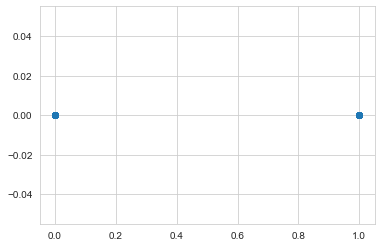

In [48]:
plt.scatter(y_test,predictions)

In [49]:
from sklearn.metrics import classification_report,confusion_matrix

In [50]:
print(confusion_matrix(y_test,predictions))
print('\n')
print(classification_report(y_test,predictions))

[[80  0]
 [40  0]]


              precision    recall  f1-score   support

           0       0.67      1.00      0.80        80
           1       0.00      0.00      0.00        40

    accuracy                           0.67       120
   macro avg       0.33      0.50      0.40       120
weighted avg       0.44      0.67      0.53       120



C:\Users\97798\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\97798\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\97798\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [56]:
from sklearn.preprocessing import StandardScaler
df_new.head()

,Age,Salary,Purchase Iphone,Male
0,19,19000,0,1
1,35,20000,0,1
2,26,43000,0,0
3,27,57000,0,0
4,19,76000,0,1


In [52]:
scaler = StandardScaler()

In [53]:
scaler.fit(df_new.drop('Purchase Iphone',axis = 1))

StandardScaler()

In [55]:
scaled_features = scaler.transform(df_new.drop('Purchase Iphone',axis=1))

In [57]:
df_feat = pd.DataFrame(scaled_features,columns=['Age','Salary','Male'])

In [58]:
df_feat.head()

,Age,Salary,Male
0,-1.781797,-1.490046,1.020204
1,-0.253587,-1.460681,1.020204
2,-1.113206,-0.785290,-0.980196
3,-1.017692,-0.374182,-0.980196
4,-1.781797,0.183751,1.020204


In [59]:
from sklearn.model_selection import train_test_split

In [60]:
X_train, X_test, y_train, y_test = train_test_split(scaled_features,df_new['Purchase Iphone'],
                                                    test_size=0.30)

In [61]:
from sklearn.neighbors import KNeighborsClassifier

In [62]:
knn= KNeighborsClassifier(n_neighbors=1)

In [63]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [64]:
pred = knn.predict(X_test)

In [65]:
from sklearn.metrics import classification_report,confusion_matrix

In [66]:
print(confusion_matrix(y_test,pred))

[[74  7]
 [ 8 31]]


In [67]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.90      0.91      0.91        81
           1       0.82      0.79      0.81        39

    accuracy                           0.88       120
   macro avg       0.86      0.85      0.86       120
weighted avg       0.87      0.88      0.87       120



In [69]:
error_rate = []


for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

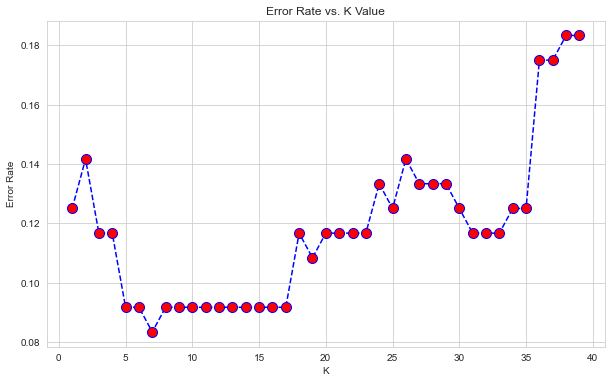

In [70]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [71]:
# FIRST A QUICK COMPARISON TO OUR ORIGINAL K=1
knn = KNeighborsClassifier(n_neighbors=1)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=1')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=1


[[74  7]
 [ 8 31]]


              precision    recall  f1-score   support

           0       0.90      0.91      0.91        81
           1       0.82      0.79      0.81        39

    accuracy                           0.88       120
   macro avg       0.86      0.85      0.86       120
weighted avg       0.87      0.88      0.87       120

